In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
raw_model_evaluation_result = pd.read_excel("../result/ML-result-MetaData1所有結果.xlsx").fillna("None")
raw_model_evaluation_result

,Data_ID,MetaData_ID,Split_ID,Standardization,Decomposition,FeatureSelection,Model,Features,Set,Number_of_Data,...,Recall_for_0,Macro Recall,Micro Recall,Accuracy,ROC-AUC,fpr,tpr,True_value,Predict_value,Predict_prob_value
0,1,MetaData-1,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",train,1815,...,1.000000,0.500000,0.679890,0.679890,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32018596148944983, 0.32018596148944983, 0.3..."
1,1,MetaData-1,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",vali,606,...,1.000000,0.500000,0.674917,0.674917,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32018596148944983, 0.32018596148944983, 0.3..."
2,1,MetaData-1,Split-1,standardization,None,None,Random Forest with Entropy,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",test,606,...,1.000000,0.500000,0.676568,0.676568,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32018596148944983, 0.32018596148944983, 0.3..."
3,1,MetaData-1,Split-1,standardization,None,None,Random Forest with Gini,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",train,1815,...,1.000000,0.500000,0.679890,0.679890,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3216227379796153, 0.3216227379796153, 0.321..."
4,1,MetaData-1,Split-1,standardization,None,None,Random Forest with Gini,"['Arterial_mean', 'Arterial_std', 'Arterial_ma...",vali,606,...,1.000000,0.500000,0.674917,0.674917,0.500000,"[0.0, 1.0]","[0.0, 1.0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.3216227379796153, 0.3216227379796153, 0.321..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,13,MetaData-1,Split-1,None,None,SFS,LightGBM,"['Arterial_max', 'Arterial_median', 'Venous_me...",vali,606,...,1.000000,0.997368,0.998350,0.998350,1.000000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.005263157894736842, 1.0, 1.0]","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0.10884064064930032, 0.012411753181429085, 0...."
737,13,MetaData-1,Split-1,None,None,SFS,LightGBM,"['Arterial_max', 'Arterial_median', 'Venous_me...",test,606,...,0.913366,0.756188,0.808581,0.808581,0.864903,"[0.0, 0.0, 0.0, 0.0024752475247524753, 0.00247...","[0.0, 0.0049504950495049506, 0.103960396039603...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0.34626029499183053, 0.5871857726234463, 0.09..."
738,13,MetaData-1,Split-1,None,None,SFS,CatBoost,"['Arterial_min', 'Arterial_median', 'Venous_me...",train,1815,...,1.000000,1.000000,1.000000,1.000000,1.000000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.001718213058419244, 1.0, 1.0]","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0.000571833264688188, 0.0005249641890380781, ..."
739,13,MetaData-1,Split-1,None,None,SFS,CatBoost,"['Arterial_min', 'Arterial_median', 'Venous_me...",vali,606,...,1.000000,1.000000,1.000000,1.000000,1.000000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.005263157894736842, 1.0, 1.0]","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0.0008727189291618597, 0.0003165309587768815,..."


## 將原始模型評估結果彙整成交叉表格

In [65]:
group_by_list = ["MetaData_ID", "Split_ID", "Standardization", "Decomposition", "FeatureSelection", "Set", "Model"]
# group_by_list = ["Decomposition", ]
raw_model_evaluation_result = raw_model_evaluation_result.drop(columns = [i for i in raw_model_evaluation_result.columns if raw_model_evaluation_result[i].dtype == "O" and i not in group_by_list])
# MetaData_ID_list = raw_model_evaluation_result["MetaData_ID"].unique().tolist()
# Split_ID_list = raw_model_evaluation_result["Split_ID"].unique().tolist()
# standardization_list = raw_model_evaluation_result["Standardization"].unique().tolist()
# decomposition_list = raw_model_evaluation_result["Decomposition"].unique().tolist()
# feature_selection_list = raw_model_evaluation_result["FeatureSelection"].unique().tolist()

# Group by
mean_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).mean().drop(columns = ["Data_ID"])
std_totalResult = raw_model_evaluation_result.groupby(by = group_by_list).std().drop(columns = ["Data_ID"])

# Define MultiIndex and Column
multiindex = mean_totalResult.index
column = mean_totalResult.columns

# Combine Mean and Standardization
totalResult = pd.DataFrame([["{} ({})".format(round(one_mean, 4), round(one_std, 4)) for one_mean, one_std in zip(one_mean_list, one_std_list) ] for one_mean_list, one_std_list in zip(mean_totalResult.values.tolist(), std_totalResult.values.tolist())],
                           index = multiindex, columns = column)
totalResult.to_excel("../result/ML-result-MetaData1彙整結果.xlsx")

In [67]:
mean_totalResult

Number_of_Data  \
MetaData_ID Split_ID Standardization Decomposition FeatureSelection Set  Model                                        
MetaData-1  Split-1  None            None          None             test CatBoost                             606.0   
                                                                         Extra Tree with Entropy              606.0   
                                                                         Extra Tree with Gini                 606.0   
                                                                         LightGBM                             606.0   
                                                                         Random Forest with Entropy           606.0   
...                                                                                                             ...   
                     standardization None          SFS              vali Extra Tree with Gini                 606.0   
                                                                         LightGBM                             606.0   
                                                                         Random Forest with Entropy           606.0   
                                                                         Random Forest with Gini              606.0   
                                                                         XGBoost                              606.0   

                                                                                                     F1-Score_for_1  \
MetaData_ID Split_ID Standardization Decomposition FeatureSelection Set  Model                                        
MetaData-1  Split-1  None            None          None             test CatBoost                          0.649612   
                                                                         Extra Tree with Entropy           0.016856   
                                                                         Extra Tree with Gini              0.000000   
                                                                         LightGBM                          0.635226   
                                                                         Random Forest with Entropy        0.000000   
...                                                                                                             ...   
                     standardization None          SFS              vali Extra Tree with Gini              0.000000   
                                                                         LightGBM                          0.974193   
                                                                         Random Forest with Entropy        0.000000   
                                                                         Random Forest with Gini           0.000000   
                                                                         XGBoost                           0.998728   

                                                                                                     F1-Score_for_0  \
MetaData_ID Split_ID Standardization Decomposition FeatureSelection Set  Model                                        
MetaData-1  Split-1  None            None          None             test CatBoost                          0.860592   
                                                                         Extra Tree with Entropy           0.810248   
                                                                         Extra Tree with Gini              0.813091   
                                                                         LightGBM                          0.853591   
                                                                         Random Forest with Entropy        0.813091   
...                                                                                                             ...   
                     standardization None          SF

## 結果繪圖

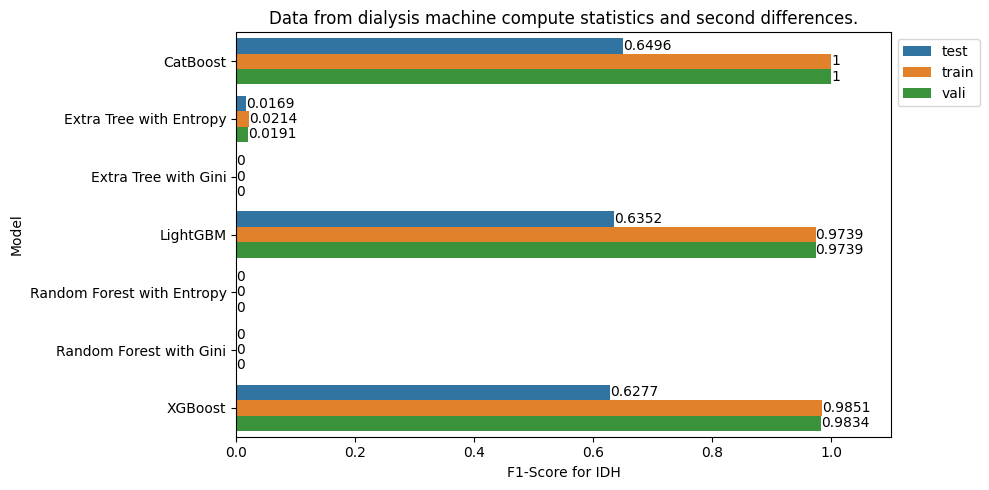

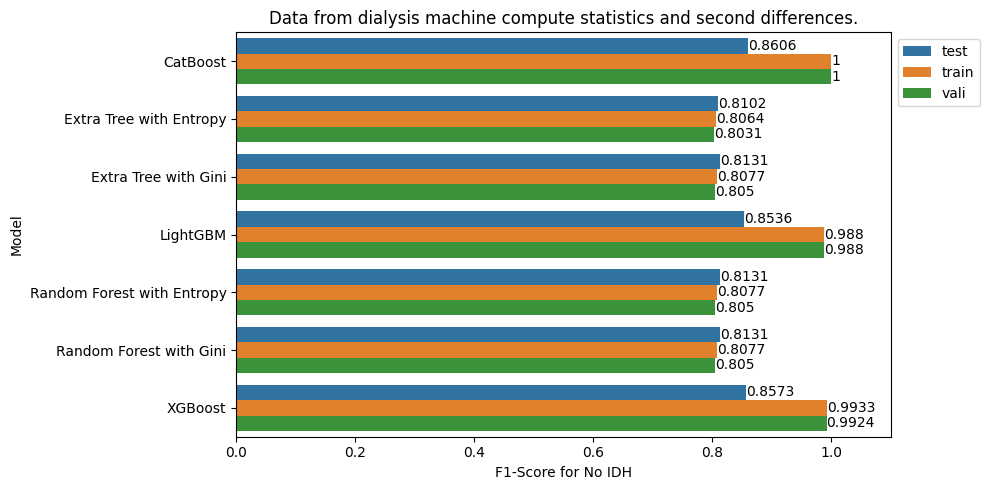

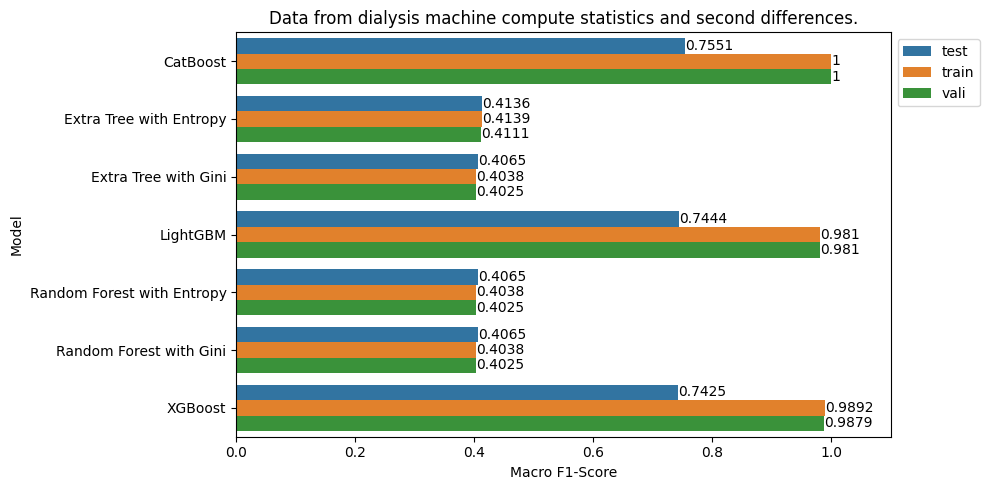

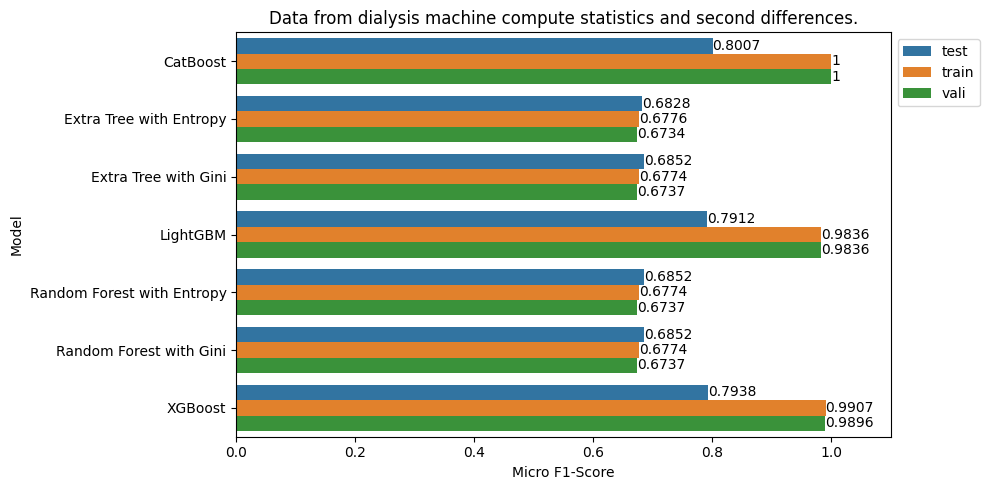

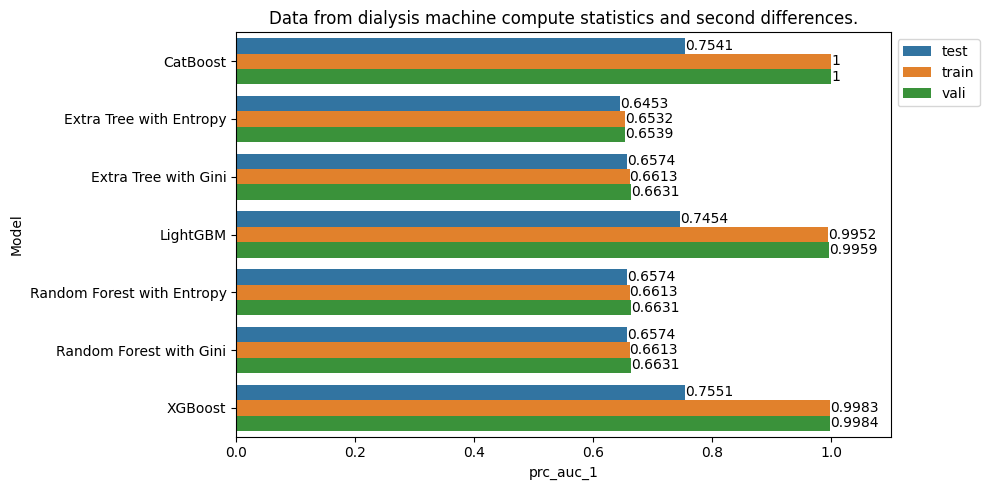

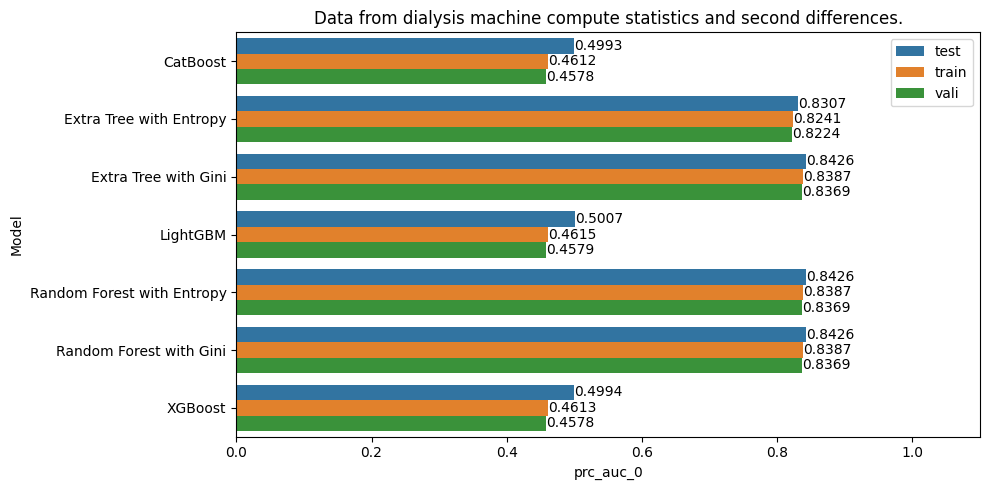

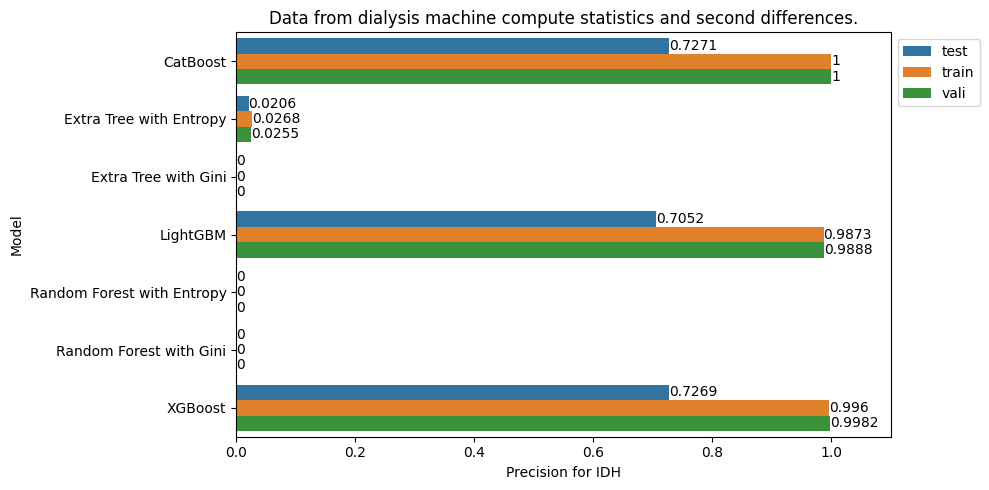

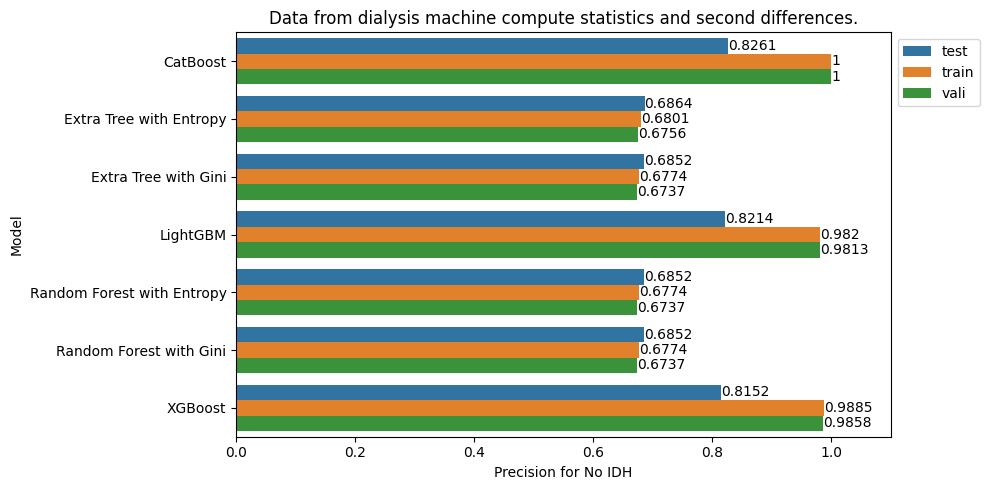

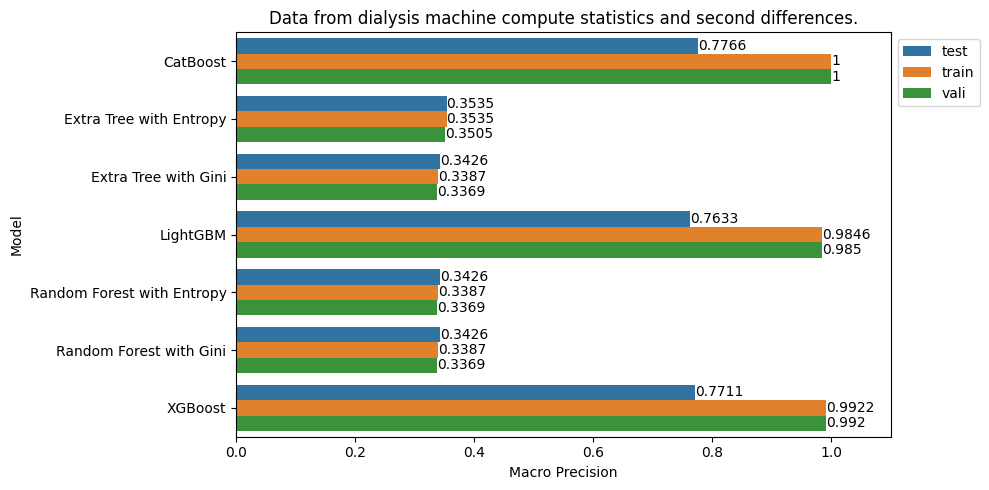

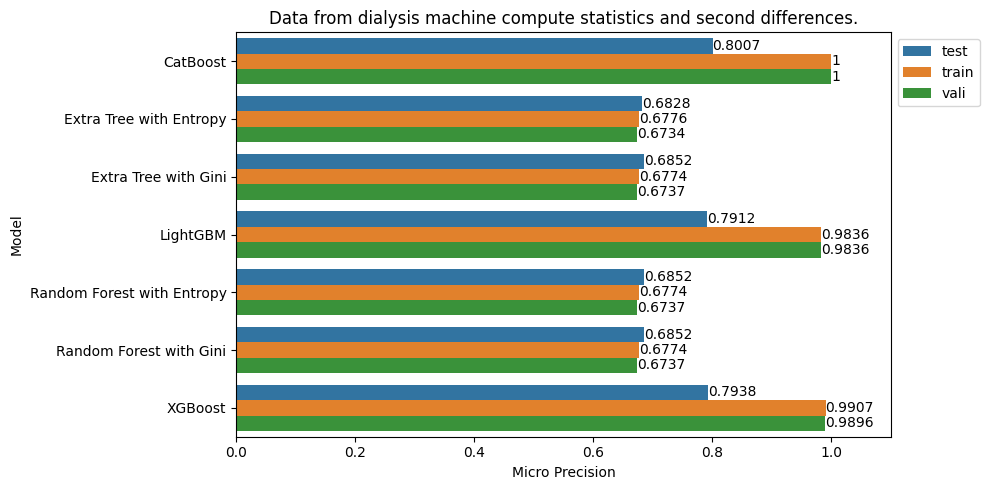

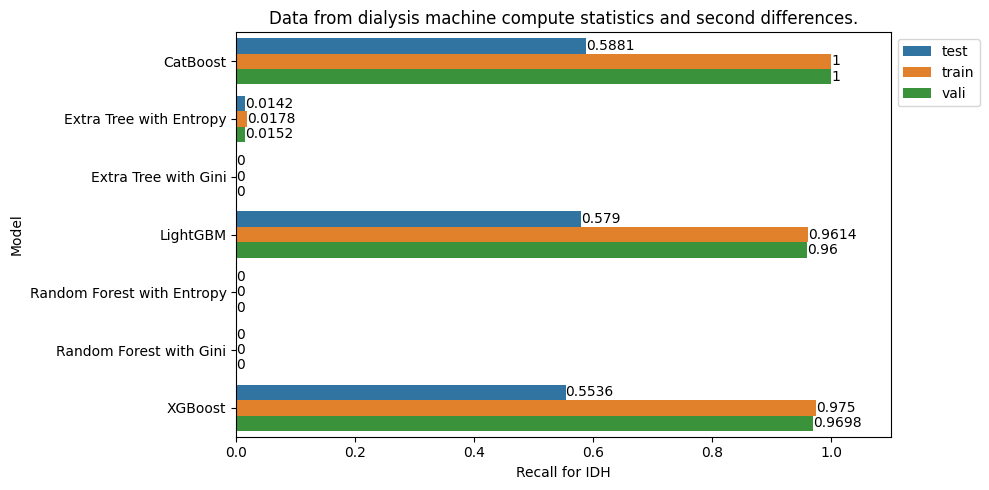

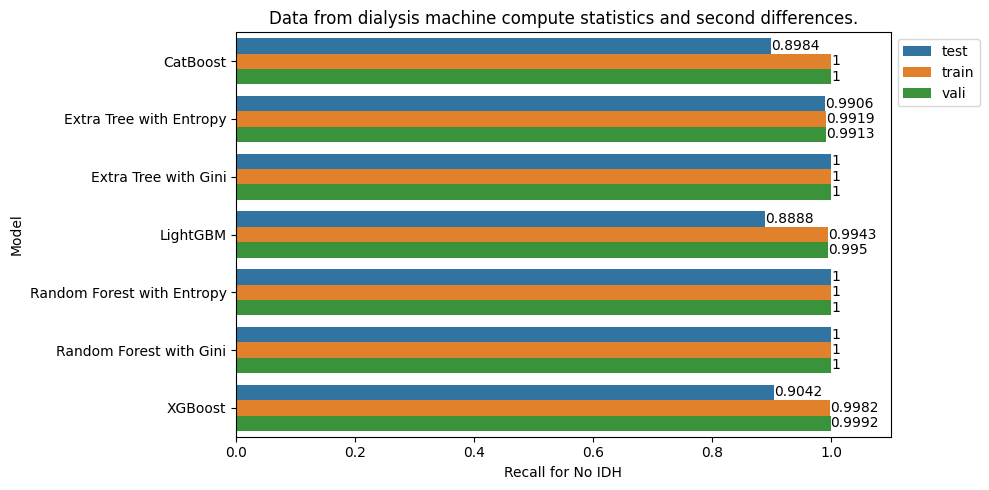

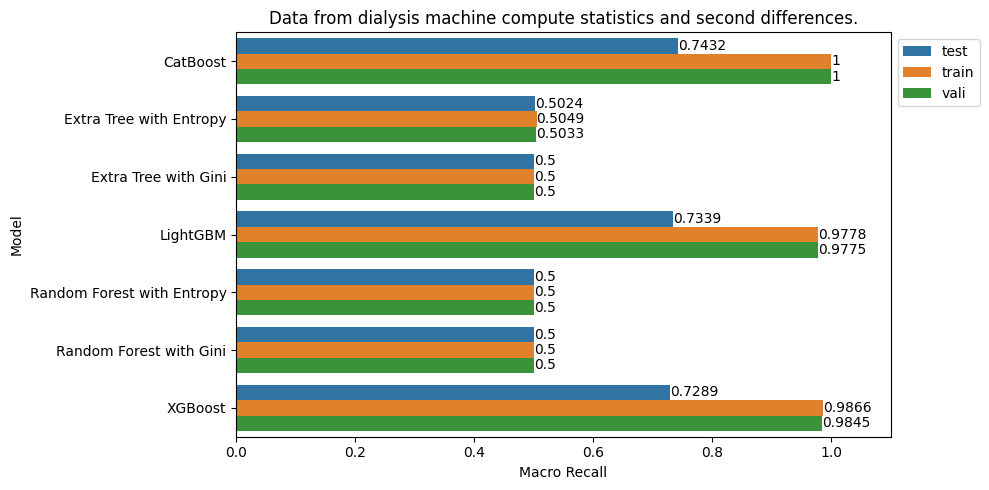

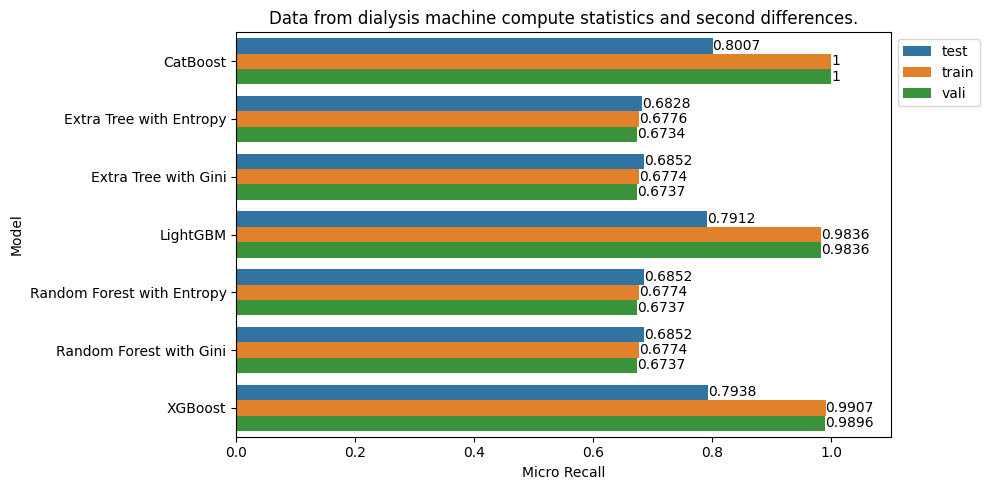

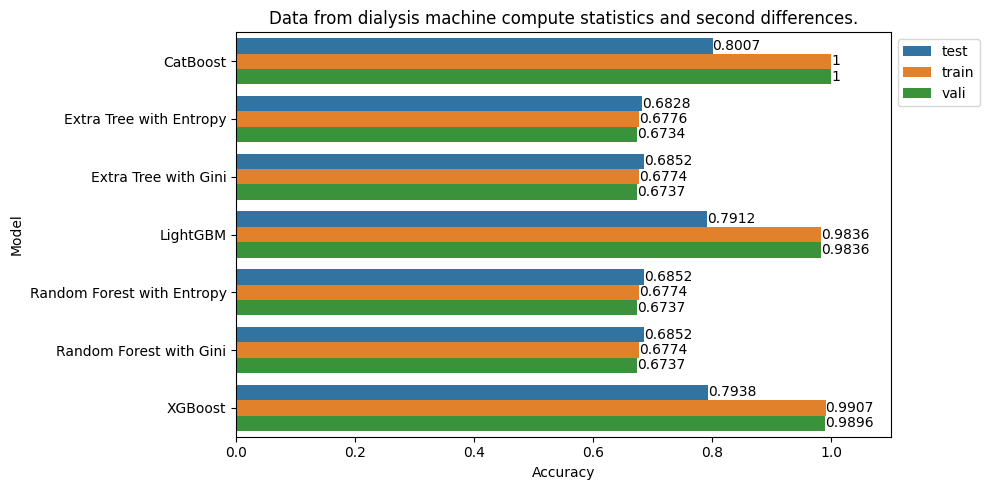

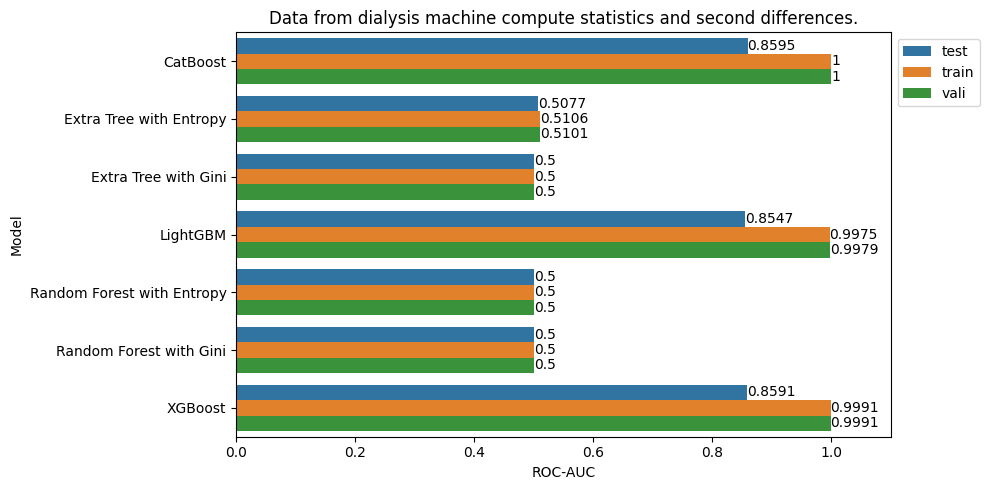

In [96]:
select_mean_totalResult = mean_totalResult.reset_index()
select_mean_totalResult = select_mean_totalResult.query("Standardization == 'None' and FeatureSelection == 'None'")

for one_column in column[1:]:
    select_mean_totalResult[one_column] = select_mean_totalResult[one_column].apply(lambda x: round(x, 4))
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(data = select_mean_totalResult, y = "Model", x = one_column, hue = "Set")
    for i in ax.containers:
        ax.bar_label(i, )

    if "_for_1" in one_column:
        one_column = one_column.replace("_for_1", " for IDH")
    elif "_for_0" in one_column:
        one_column = one_column.replace("_for_0", " for No IDH")
    plt.xlabel(one_column)
    plt.legend(bbox_to_anchor = (1, 1))
    plt.xlim(0, 1.1)
    plt.title("Data from dialysis machine compute statistics and second differences.")
    plt.tight_layout()
    plt.savefig(f"../result/Result_Plot/MetaData1_Model_Evaluation_{one_column}.png")
    plt.show()